In [1]:
import pandas as pd
import io
import requests as rt
import tweepy
from tweepy.parsers import JSONParser
import json
import csv
import matplotlib.pyplot as plt
% matplotlib inline 

# **Gathering:**

Steps:
1. Upload 'twitter-archive-enhanced.csv' file to directory and read it into notebook.
2. Get and read 'image_predictions.tsv' file from Udacity's server
3. Extract tweet IDs from 'twitter-archive-enhanced.csv'
4. Use Twitter API to get 'tweet_jason.txt' file.
5. Extract relevant columns from 'tweet_jason.txt' into a dataframe.

In [2]:
#Step 1

df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Step 2

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with rt.Session() as s:
    resp = rt.get(url)
    df2 = pd.read_csv(io.StringIO(resp.text))
    df2.to_csv('image_predictions.tsv', index = False, header=True)
    df2=pd.read_csv('image_predictions.tsv',sep='\t')

In [4]:
#Step 3

twitter_id_list = df1.tweet_id.tolist()

Step 4
Code has been made into text as it only needs to be run once.

consumer_secret = '[removed]' 
consumer_key = '[removed]'
access_token = '[removed]'
access_token_secret = '[removed]'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser = JSONParser(), wait_on_rate_limit = True)
count=1
count2=1
with open('tweet_json.txt', 'w') as file:
    for tweet in twitter_id_list:
        try:
            tweet_info=api.get_status(tweet, tweet_mode='extended')
            file.write(json.dumps(tweet_info)+ '\n')
            print('Tweet Found')
            count2 = count2 + 1
        except:
            print('No tweet found Number {}'.format(count))
            count = count + 1

In [5]:
#Step 5

all_data = []
switch = True
with open('tweet_json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        eachDict = json.loads(line)
        if eachDict['entities'].get('media'):
            all_data.append(eachDict)

**Reference for code block above:** https://knowledge.udacity.com/questions/415115

In [6]:
list1=[]
for i in range(2059):
    line = all_data[i]
    to_append = line['id'], line['retweet_count'], line['favorite_count'], line['retweeted'], line['full_text']
    list1.append(to_append)

In [7]:
df3 = pd.DataFrame(list1, columns = ['id','retweet_count','favorite_count','retweeted','text'])

# ASSESSING:

In [8]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
2178,669015743032369152,NaN,NaN,2015-11-24 04:52:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog right here guys. Doesn't bark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669015743...,10,10,None,None,None,None,None
1033,745074613265149952,NaN,NaN,2016-06-21 02:03:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Jeffrey. He wasn't prepared to execute...,NaN,NaN,NaN,https://vine.co/v/iQm3JAXuFmv,11,10,Jeffrey,None,None,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maximus. A little rain won't stop him....,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brownie. She's wearing a Halloween the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789599242...,12,10,Brownie,None,None,None,None
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He is one skeptical pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672975131...,10,10,Chuckles,None,None,pupper,None
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888...,10,10,None,None,None,None,None
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None


In [9]:
df3.sample(10)

,id,retweet_count,favorite_count,retweeted,text
410,810254108431155201,3305,14484,False,"This is Gus. He likes to be close to you, whic..."
1053,709158332880297985,393,1953,False,Meet Rodney. He's a Ukranian Boomchicka. Outsi...
1289,689289219123089408,888,2165,False,Someone sent me this without any context and e...
102,868622495443632128,4711,24474,False,Here's a h*ckin peaceful boy. Unbothered by th...
1729,672082170312290304,336,878,False,This is Patch. He wants to be a Christmas tree...
335,820749716845686786,9604,30915,False,Meet Sunny. He can take down a polar bear in o...
1642,674019345211760640,283,1059,False,This is Acro. You briefly see her out of the c...
590,780192070812196864,2184,8532,False,We only rate dogs. Pls stop sending in non-can...
676,766008592277377025,482,3658,False,This is Angel. She stole the @ShopWeRateDogs s...
1208,695794761660297217,737,3048,False,This is Wyatt. His throne is modeled after him...


In [10]:
df2.p1.value_counts().sample(10)

meerkat               2
box_turtle            2
miniature_poodle      8
kelpie               11
canoe                 1
Yorkshire_terrier     8
hermit_crab           2
balloon               3
sandbar               1
water_bottle          1
Name: p1, dtype: int64

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 5 columns):
id                2059 non-null int64
retweet_count     2059 non-null int64
favorite_count    2059 non-null int64
retweeted         2059 non-null bool
text              2059 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 66.4+ KB


**Quality Issues:**
1. DF1 timestamp data type is a string instead of datetime.
2. DF1 index 2034, 2066, and 2116 names are incorrect. Should be 'Jacob', 'Rufus', and 'Spork' respectively.
3. DF1 names 'a','an',and 'the' are either incorrect or not descriptive enough. Since they indicate a lack of name identification, these are not consistent with the existing 'None' value.
4. DF2 dog breed names are not case consistent.
5. DF2 dog names have different characters for spaces. Mainly, - or _. 
6. Retweet and reply rows exist in DF1 and need to be removed.
7. For DF1, where denominator is not 10, most are not actual ratings but dates, names (e.g. 7/11), etc.
8. DF1 source column has tags and other unecessary coding.

**Tidiness Issues:**
1. DF3 can be merged with DF1
2. Once DF3 and DF1 are merged, reply and retweet indicator columns can be removed as only original tweets remain. Additionally, text_y column can be removed, too.
3. DF1 doggo, floofer, pupper, puppo column is unnecessary and can be collapsed into one column.

# CLEANING:

In [12]:
# Creating copies of df1, df2, and df3 for cleaning.
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Quality Issue 1:

**Define:**
- For DF1 table, change timestamp column data type to datetime using to_datetime.

**Code:**

In [13]:
df1_clean.timestamp = pd.to_datetime(df1.timestamp, yearfirst=True)

**Test:**

In [14]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Quality Issue 2:

**Define:**
- For DF1, name column at indexes 2034, 2066, and 2116 to be corrected to 'Jacob', 'Rufus', and 'Spork' respectively using iloc.

**Code:**

In [15]:
df1_clean.name.iloc[2034]='Jacob'
df1_clean.name.iloc[2066]='Rufus'
df1_clean.name.iloc[2116]='Spork'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Test:**

In [16]:
df1_clean.name.iloc[2034], df1_clean.name.iloc[2066], df1_clean.name.iloc[2116]

('Jacob', 'Rufus', 'Spork')

### Quality Issue 3:

**Define:**
- For DF1, name rows with 'a','an',and 'the' to be replaced with 'None' for clarity/correction and to match existing 'None' inputs.

**Code:**

In [17]:
df1_clean.name = df1_clean.name.replace(to_replace=['a', 'an', 'the'], value='None')    

**Test:**

In [18]:
test_list = ['a', 'an', 'the']
list(df1_clean.name) in test_list

False

### Quality Issue 4:

**Define:**
- For DF2, dog breed names to all be made in lower case.

**Code:**

In [19]:
df2_clean.p1 = df2_clean.p1.str.lower()
df2_clean.p2 = df2_clean.p2.str.lower()
df2_clean.p3 = df2_clean.p3.str.lower()

**Test:**

In [20]:
df2_clean.p1.str.contains(r'.*[A-Z].*').sum(), df2_clean.p2.str.contains(r'.*[A-Z].*').sum(), df2_clean.p3.str.contains(r'.*[A-Z].*').sum()

(0, 0, 0)

### Quality Issue 5:

**Define:**
- For DF2, dog breed names '-' string characters to be replaced with '_' for consistency.

**Code:**

In [21]:
df2_clean.p1 = df2_clean.p1.str.replace('-', '_', regex=False)
df2_clean.p2 = df2_clean.p2.str.replace('-', '_', regex=False)
df2_clean.p3 = df2_clean.p3.str.replace('-', '_', regex=False)

**Test:**

In [22]:
df2_clean.p1.str.contains('-').sum(), df2_clean.p2.str.contains('-').sum(), df2_clean.p3.str.contains('-').sum()

(0, 0, 0)

### Quality Issue 6:

**Define:**
- For DF1, keep rows where values on the retweeted_status_id column and in_reply_to_status_id are null.

**Code:**

In [23]:
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean = df1_clean[df1_clean.in_reply_to_status_id .isnull()]

**Test:**

In [24]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Quality Issue 7:

**Define:**
- For DF1, keep rows where values on the denominator column are exactly 10.

**Code:**

In [25]:
df1_clean = df1_clean[df1_clean.rating_denominator == 10]

**Test:**

In [26]:
df1_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Quality Issue 8:

**Define:**
- For DF1, replace the source values with new readable values (e.g. 'Twitter for iPhone')

**Code:**

In [27]:
df1_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df1_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', inplace=True)
df1_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df1_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

**Test:**

In [28]:
df1_clean.source.value_counts()

Twitter for iPhone    1947
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Tidiness Issue 1:

**Define:**
- Merge DF3 and DF1 according to tweet_id.

**Code:**

In [29]:
df3_clean = df3_clean.rename(columns={'id':'tweet_id'})

In [30]:
df4_merged = df1_clean.merge(df3_clean, on='tweet_id')

**Test:**

In [31]:
df4_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,retweeted,text_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,7352,35008,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,5482,30318,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,3623,22802,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,None,None,None,7534,38276,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,None,None,None,8119,36559,False,This is Franklin. He would like you to stop ca...


### Tidiness Issue 2:

**Define:**
- Drop reply and retweet indicator columns along with text_y column.

**Code:**

In [32]:
df4_merged.drop(axis=1, columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','text_y'], inplace=True)

**Test:**

In [33]:
list(df4_merged.columns)

['tweet_id',
 'timestamp',
 'source',
 'text_x',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'retweeted']

### Tidiness Issue 3:

**Define:**
- Collapse doggo/floofer/pupper/puppo columns into one column by extracting dog stage nicknames into a new column.

**Code:**

In [34]:
df4_merged['dog_stage_name'] = df4_merged.text_x.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df4_merged.drop(axis=1,columns=['floofer','pupper','puppo','doggo'], inplace=True)

**Test:**

In [35]:
df4_merged.head()

,tweet_id,timestamp,source,text_x,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,retweeted,dog_stage_name
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7352,35008,False,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5482,30318,False,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3623,22802,False,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7534,38276,False,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8119,36559,False,NaN


### Miscellaneous Changes:

In [36]:
#Renaming text column name.
df4_merged.rename(columns={'text_x':'original_text'},inplace=True)

#Asssigning final tables

final_tweetinfo = df4_merged
final_prediction = df2_clean

# Storing Cleaned Data

Since we have two tables, we have saved them as 'twitter_archive_master.csv' and as 'tweet_prediction_master.csv'

In [37]:
final_tweetinfo.to_csv ('twitter_archive_master.csv', index = False, header=True)

In [38]:
final_prediction.to_csv ('tweet_prediction_master.csv', index = False, header=True)

# Analysis

In [39]:
# To ease with DataFrame calling, the two tables have been merged as df_3.

df_3 = final_tweetinfo.merge(final_prediction, on='tweet_id')

### Insight # 1: 


**Question:**  Which dog breed gets posted the most?

**Answer:** Golden retriever

In [40]:
# Narrowing table rows as there are inaccurate predictions and non-dog predictions.
t1 = df_3[(df_3.p1_dog == True) & (df_3.p1_conf >= 0.7)]
# Determining how many tweets for each breed and keeping the top 10 for visualizing.
t2 = pd.DataFrame(t1.p1.value_counts().nlargest(10))
# Fixing index, which should be a column & Renaming columns
t2.reset_index(inplace = True)
t2.rename(columns = {'p1':'count', 'index':'breed'}, inplace=True)

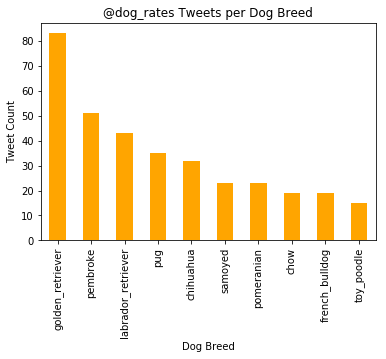

In [41]:
# Plotting
t2.plot.bar(x='breed', color='orange', legend=None)
plt.xlabel('Dog Breed')
plt.ylabel('Tweet Count')
plt.title('@dog_rates Tweets per Dog Breed');

### Insight # 2: 



**Question:**  How much has monthly engagement (retweets and favorites) increased between the earliest and latest month?

**Answer:** Between the start (November 2015) and end months (July 2017), mean retweet and favorite counts increased 7.4% and 16.2% respectively.

In [42]:
# Setting date limits for the start and end months 
import datetime as dt

sd1=dt.datetime(2015,11,15)
sd2=dt.datetime(2015,12,16)
ed1=dt.datetime(2017,7,1)
ed2=dt.datetime(2017,8,2)

In [43]:
#Querying rows for the start and end months and assigning them

start_month = df_3[(df_3.timestamp>sd1) & (df_3.timestamp<sd2)]
end_month = df_3[(df_3.timestamp>ed1) & (df_3.timestamp<ed2)]

In [44]:
(end_month.retweet_count.mean()-start_month.retweet_count.mean())/start_month.retweet_count.mean()

7.4200545755397078

In [45]:
(end_month.favorite_count.mean()-start_month.favorite_count.mean())/start_month.favorite_count.mean()

16.201748122806933

### Insight # 3: 



**Question:**  What is the most common dog name in the tweets?

**Answer:** Oliver, Charlie, and Cooper are the most observed names in the tweets.

In [46]:
#Querying and counting values. Keeping the 10 values with the most counts.

t3 = df_3[df_3.name != 'None'].name.value_counts().nlargest(10)

#Turning data into DataFrame table, fixing index and renaming columns.
t3 = pd.DataFrame(t3)
t3.reset_index(inplace = True)
t3.rename(columns = {'name':'count', 'index':'name'}, inplace=True)

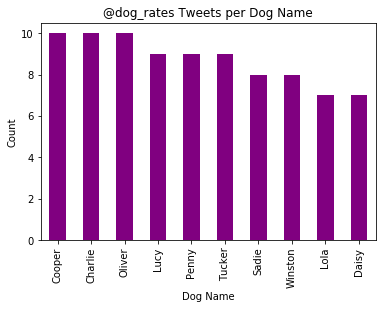

In [47]:
# Plotting
t3.plot.bar(x='name', color='purple', legend=None)
plt.xlabel('Dog Name')
plt.ylabel('Count')
plt.title('@dog_rates Tweets per Dog Name');